In [16]:
import pandas as pd

In [17]:
urls_data = pd.read_csv("url_dataset.csv")

In [18]:
urls_data.head(10)

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,domain_registration_length,age_of_domain,dns_record,statistical_report
0,http,www.liquidgeneration.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1
1,http,www.onlineanime.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1
2,http,www.ceres.dti.ne.jp,~nekoi/senno/senfirst.html,0,0,0,0,1,0,0,1,1,1,1,1,1
3,http,www.galeon.com,kmh/,0,0,0,0,0,0,0,1,1,1,1,1,1
4,http,www.fanworkrecs.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1
5,http,www.animehouse.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1
6,http,www2.117.ne.jp,~mb1996ax/enadc.html,0,0,0,0,2,0,0,1,1,1,1,1,1
7,http,archive.rhps.org,fritters/yui/index.html,0,0,0,0,0,0,0,1,1,1,1,1,1
8,http,www.freecartoonsex.com,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1
9,http,www.cutepet.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1


In [19]:
urls_data.columns

Index(['protocol', 'domain_name', 'address', 'long_url', 'having_@_symbol',
       'redirection_//_symbol', 'prefix_suffix_seperation', 'sub_domains',
       'having_ip_address', 'shortening_service', 'https_token',
       'abnormal_url', 'domain_registration_length', 'age_of_domain',
       'dns_record', 'statistical_report'],
      dtype='object')

In [20]:
urls = urls_data.drop(urls_data.columns[[0,1,2]],axis=1)

In [21]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [22]:
urls_without_labels = urls.drop('statistical_report',axis=1)
urls_without_labels.columns
labels = urls['statistical_report']


In [23]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.20, random_state=100)

In [24]:
train_test=len(data_train),len(data_test),len(labels_train),len(labels_test)

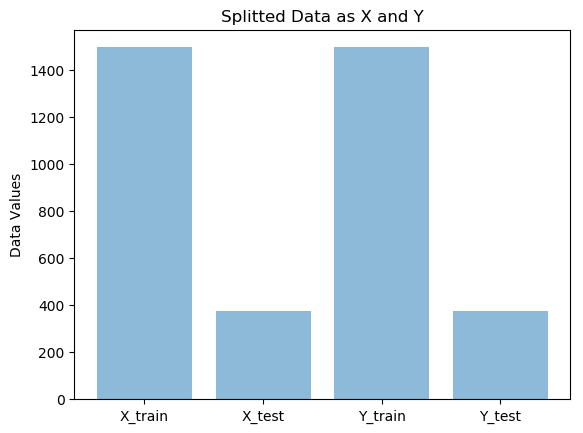

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('X_train', 'X_test', 'Y_train', 'Y_test')
y_pos = np.arange(len(objects))
performance = train_test
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Data Values')
plt.title('Splitted Data as X and Y')
 
plt.show()

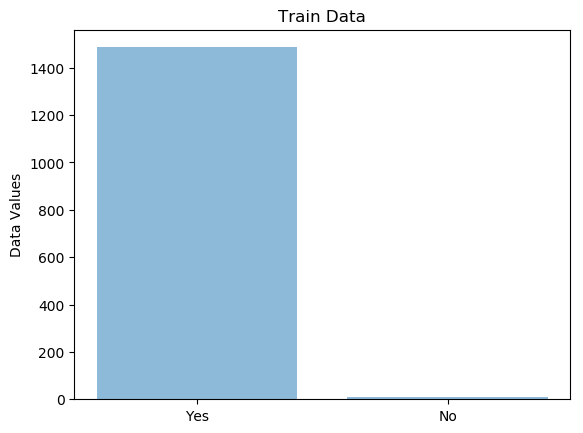

In [26]:
train_data=labels_train.value_counts()

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Yes', 'No')
y_pos = np.arange(len(objects))
performance = train_data
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Data Values')
plt.title('Train Data')
 
plt.show()

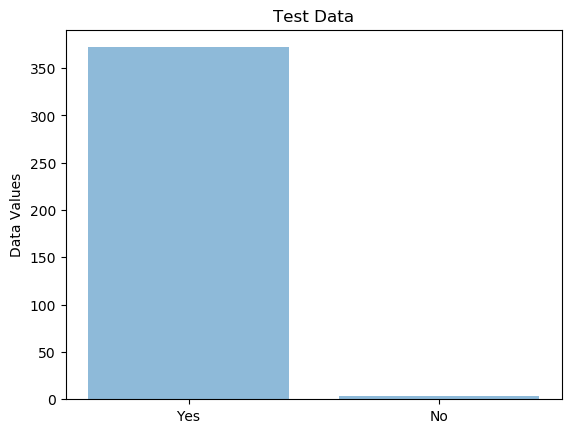

In [27]:
test_data=labels_test.value_counts()

objects = ('Yes', 'No')
y_pos = np.arange(len(objects))
performance = test_data
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Data Values')
plt.title('Test Data')
 
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(data_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
pred_label = model.predict(data_test)

In [31]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(labels_test,pred_label)
print(cm)
accuracy_score(labels_test,pred_label)

[[  3   0]
 [  0 372]]


1.0

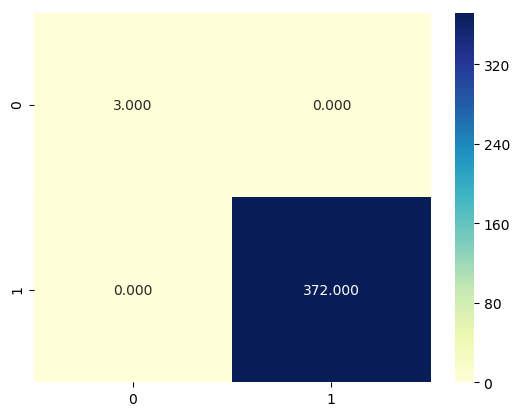

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0,1]
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()